## 1. Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    import sys
    !{sys.executable} -m pip install imblearn
    from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from scipy.stats import chi2_contingency, ttest_ind

import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

In [5]:
df = pd.read_csv('../data/raw/telco.csv')

## 3. EDA

In [6]:
df.sample(15)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
2740,7277-OZCGZ,Female,40,No,No,No,No,0,United States,California,...,0,132.00,2018.25,3,Stayed,No,75,5479,NaN,NaN
1930,7625-XCQRH,Female,48,No,No,No,No,0,United States,California,...,0,171.60,1009.55,3,Churned,Yes,76,2291,Dissatisfaction,Network reliability
2957,8095-WANWK,Female,46,No,No,No,No,0,United States,California,...,0,35.50,419.30,5,Stayed,No,38,5369,NaN,NaN
5804,7136-IHZJA,Female,30,No,No,Yes,Yes,2,United States,California,...,0,1165.60,4012.80,4,Stayed,No,43,5807,NaN,NaN
673,6557-BZXLQ,Male,66,No,Yes,No,No,0,United States,California,...,0,366.40,1409.70,3,Stayed,No,63,5610,NaN,NaN
3716,4115-UMJFQ,Male,37,No,No,No,No,0,United States,California,...,150,0.00,2642.25,5,Stayed,No,32,4043,NaN,NaN
1954,0746-JTRFU,Male,22,Yes,No,No,No,0,United States,California,...,0,0.00,56.35,1,Churned,Yes,77,4810,Dissatisfaction,Product dissatisfaction
5724,3446-QDSZF,Female,57,No,No,No,No,0,United States,California,...,0,155.84,383.19,4,Stayed,No,66,2328,NaN,NaN
6109,1346-PJWTK,Male,63,No,No,Yes,No,0,United States,California,...,0,1081.53,6813.38,3,Stayed,No,70,4806,NaN,NaN
5778,1561-BWHIN,Male,33,No,No,Yes,Yes,1,United States,California,...,0,249.47,593.97,5,Stayed,No,27,4464,NaN,NaN


In [7]:
df.shape

(7043, 50)

In [8]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

## 4. Handling Missing Values

In [10]:
df.isnull().sum() * 100 / df.shape[0]

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Under 30                              0.000000
Senior Citizen                        0.000000
Married                               0.000000
Dependents                            0.000000
Number of Dependents                  0.000000
Country                               0.000000
State                                 0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Population                            0.000000
Quarter                               0.000000
Referred a Friend                     0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                55.047565
Phone Service                         0.000000
Avg Monthly L

In [11]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [12]:
df['Internet Type'] = df['Internet Type'].fillna("No Internet Connection")

In [13]:
df['Offer'] = df['Offer'].fillna("None")
df['Churn Category'] = df['Churn Category'].fillna('Not Applicable')
df['Churn Reason'] = df['Churn Reason'].fillna('Not Applicable')

## 5. Dropping Redundant Columns

In [14]:
df.drop(columns=["Senior Citizen", "Under 30",'Customer ID', 'Country', 'State', 'Quarter','Customer Status'], inplace=True)

In [15]:
df.shape

(7043, 43)

In [16]:
df.columns

Index(['Gender', 'Age', 'Married', 'Dependents', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Label', 'Churn Score',
       'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [17]:
# for c in df.columns:
#     print(c)
#     print(df[c].unique())
#     print("-" * 20)

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

## 6. Data Visualization

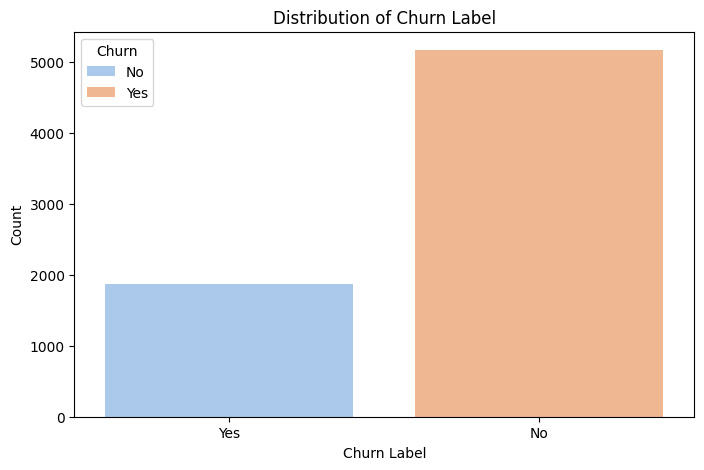

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn Label', palette='pastel')
plt.title('Distribution of Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [20]:
df['Offer'].value_counts().sort_index()

Offer
None       3877
Offer A     520
Offer B     824
Offer C     415
Offer D     602
Offer E     805
Name: count, dtype: int64

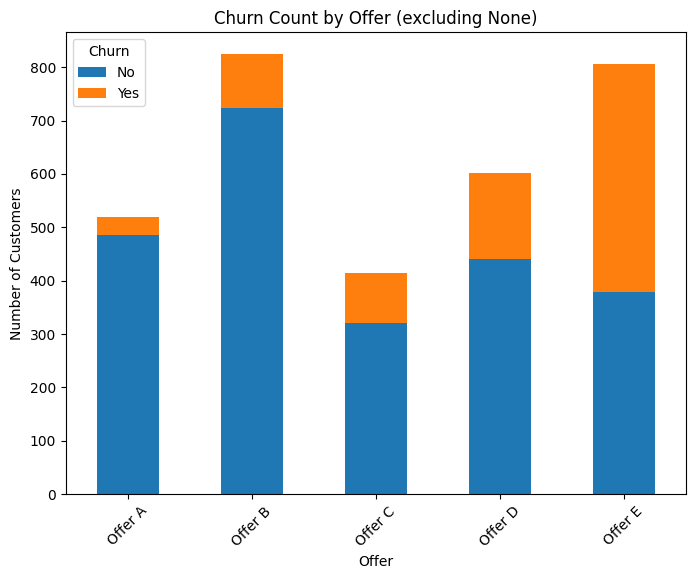

In [21]:
offer_churn = pd.crosstab(df.loc[df['Offer'] != "None", 'Offer'], df['Churn Label'])

offer_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Churn Count by Offer (excluding None)")
plt.xlabel("Offer")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

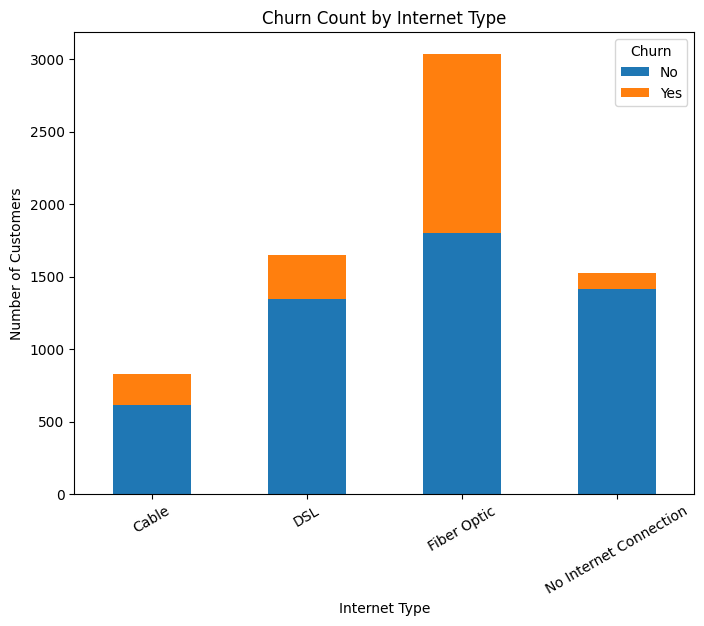

In [22]:
offer_churn = pd.crosstab(df['Internet Type'], df['Churn Label'])

offer_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Churn Count by Internet Type")
plt.xlabel("Internet Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=30)
plt.show()

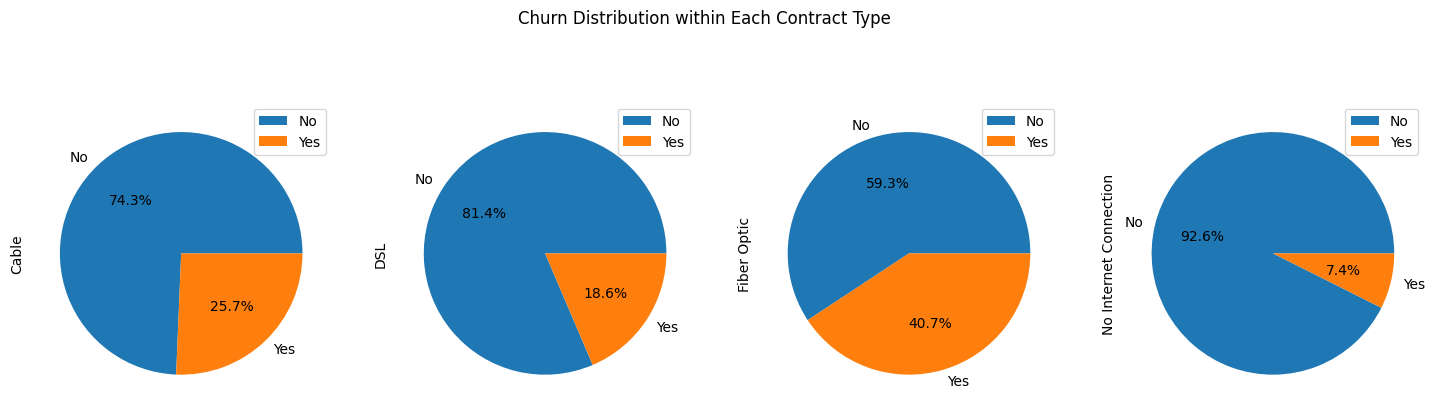

In [23]:
offer_churn.T.plot(kind='pie', subplots=True, figsize=(18,8), autopct="%.1f%%")
plt.suptitle("Churn Distribution within Each Contract Type", y=0.8) 
plt.show()


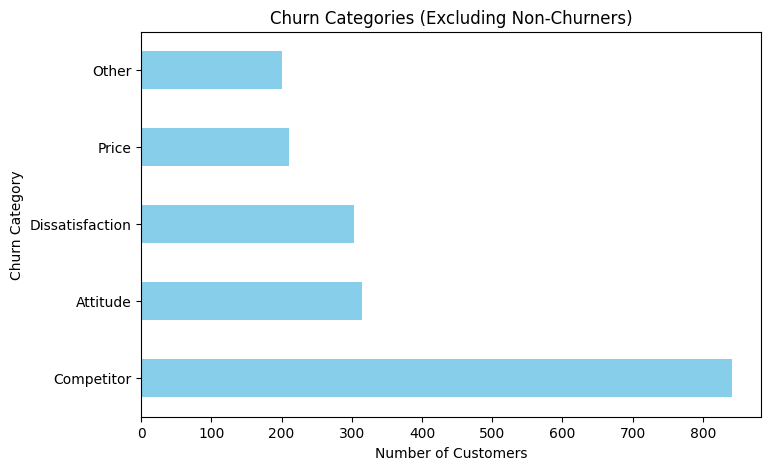

In [24]:
df['Churn Category'].value_counts().drop("Not Applicable").plot(kind='barh', figsize=(8,5), color="skyblue")

plt.title("Churn Categories (Excluding Non-Churners)")
plt.xlabel("Number of Customers")
plt.ylabel("Churn Category")
plt.show()

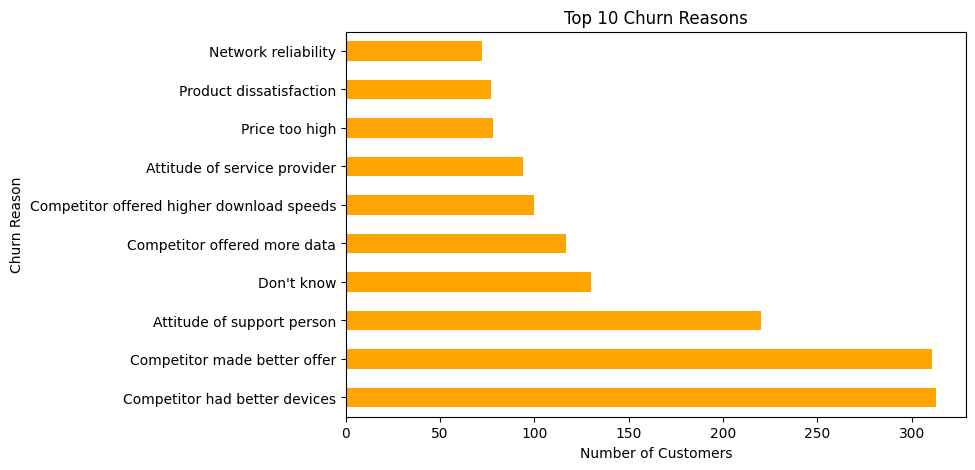

In [25]:
df['Churn Reason'].value_counts().drop("Not Applicable").head(10).plot(kind='barh', figsize=(8,5), color="orange")
plt.title("Top 10 Churn Reasons")
plt.xlabel("Number of Customers")
plt.show()

### Statistical Test

In [26]:
def feature_significance(df, target):
    
    # Separate categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Remove target from feature lists
    if target in categorical_cols:
        categorical_cols.remove(target)
    if target in numerical_cols:
        numerical_cols.remove(target)

    results = []

    # Chi-square test for categorical features
    for col in categorical_cols:
        table = pd.crosstab(df[col], df[target])
        chi2, p, dof, ex = chi2_contingency(table)
        results.append({
            'Feature': col,
            'Type': 'Categorical',
            'p-value': p,
            'Significant': p < 0.05
        })

    # t-test for numerical features
    for col in numerical_cols:
        group_yes = df[df[target] == 'Yes'][col].dropna()
        group_no = df[df[target] == 'No'][col].dropna()
        stat, p = ttest_ind(group_yes, group_no, equal_var=False)
        results.append({
            'Feature': col,
            'Type': 'Numerical',
            'p-value': p,
            'Significant': p < 0.05
        })

    results_df = pd.DataFrame(results).sort_values('p-value').reset_index(drop=True)
    
    categorical_cols = results_df[(results_df['Type'] == 'Categorical') & (results_df['Significant'])]['Feature'].tolist()
    numerical_cols = results_df[(results_df['Type'] == 'Numerical') & (results_df['Significant'])]['Feature'].tolist()

    """
    Returns:
    results_df (pd.DataFrame): DataFrame with feature, type, p-value, and significance
    categorical_cols (list): List of significant categorical features
    numerical_cols (list): List of significant numerical features
    
    """
    
    return results_df, categorical_cols, numerical_cols


In [27]:
results_df, categorical_cols, numerical_cols = feature_significance(df, target='Churn Label')

print("Categorical Features - ", categorical_cols)
print("-" * 100)
print("Numerical Features -", numerical_cols)
print("-" * 100)
print(results_df)

Categorical Features -  ['Churn Category', 'Churn Reason', 'Contract', 'Internet Type', 'Offer', 'Dependents', 'Internet Service', 'Payment Method', 'Paperless Billing', 'Online Security', 'Unlimited Data', 'Premium Tech Support', 'Married', 'Referred a Friend', 'Online Backup', 'City', 'Device Protection Plan', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Multiple Lines']
----------------------------------------------------------------------------------------------------
Numerical Features - ['Satisfaction Score', 'Churn Score', 'Number of Referrals', 'Tenure in Months', 'Number of Dependents', 'Total Long Distance Charges', 'Total Revenue', 'Total Charges', 'Monthly Charge', 'CLTV', 'Age', 'Avg Monthly GB Download', 'Population', 'Latitude', 'Total Refunds', 'Longitude']
----------------------------------------------------------------------------------------------------
                              Feature         Type        p-value  Significant
0                      Ch

## 7. Feature Engineering

In [28]:
categorical_cols

['Churn Category',
 'Churn Reason',
 'Contract',
 'Internet Type',
 'Offer',
 'Dependents',
 'Internet Service',
 'Payment Method',
 'Paperless Billing',
 'Online Security',
 'Unlimited Data',
 'Premium Tech Support',
 'Married',
 'Referred a Friend',
 'Online Backup',
 'City',
 'Device Protection Plan',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Multiple Lines']

In [29]:
for i in df[categorical_cols]: 
    print(i) 
    print(df[i].unique()) 
    print("-" * 100)

Churn Category
['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude'
 'Not Applicable']
----------------------------------------------------------------------------------------------------
Churn Reason
['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' 'Not Applicable' 'Lack of self-service on Website']
----------------------------------------------------------------------------------------------------
Contract
['Month-to-Month' 'One Year' 'Two Year']
---------------------------------------------------------------------------

In [30]:
feature_cols = numerical_cols + categorical_cols
df_features = df[feature_cols + ['Churn Label']]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Satisfaction Score           7043 non-null   int64  
 1   Churn Score                  7043 non-null   int64  
 2   Number of Referrals          7043 non-null   int64  
 3   Tenure in Months             7043 non-null   int64  
 4   Number of Dependents         7043 non-null   int64  
 5   Total Long Distance Charges  7043 non-null   float64
 6   Total Revenue                7043 non-null   float64
 7   Total Charges                7043 non-null   float64
 8   Monthly Charge               7043 non-null   float64
 9   CLTV                         7043 non-null   int64  
 10  Age                          7043 non-null   int64  
 11  Avg Monthly GB Download      7043 non-null   int64  
 12  Population                   7043 non-null   int64  
 13  Latitude          

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def prepare_features(df, target="Churn Label"):
    
    drop_cols = ["Churn Label", "Churn Category", "Churn Reason"]
    X = df.drop(columns=drop_cols, errors="ignore")
    y = df["Churn Label"]


    # detect categorical and numeric columns
    cat_cols = X.select_dtypes(include=['object']).columns.tolist()
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # build column transformer
    transformer = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', num_cols),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
        ]
    )

    X_encoded = transformer.fit_transform(X)

    return X_encoded, y, transformer


In [32]:
X_encoded, y, transformer = prepare_features(df_features, target="Churn Label")

In [33]:
y.value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42
)

# Encode labels for XGBoost
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  
y_test_enc = le.transform(y_test)


models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        scale_pos_weight=(len(y_train[y_train=="No"]) / len(y_train[y_train=="Yes"])),
        eval_metric="logloss", use_label_encoder=False, random_state=42
    )
}


results = []

for name, model in models.items():
    if name == "XGBoost":
        # Use encoded labels
        model.fit(X_train, y_train_enc)
        y_pred_enc = model.predict(X_test)
        y_pred = le.inverse_transform(y_pred_enc)  
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label="Yes")
    rec = recall_score(y_test, y_pred, pos_label="Yes")
    f1 = f1_score(y_test, y_pred, pos_label="Yes")
    roc_auc = roc_auc_score((y_test=="Yes").astype(int), y_proba)

    results.append({
        "Model": name,
        "Accuracy": round(acc,4),
        "Precision": round(prec,4),
        "Recall": round(rec,4),
        "F1-score": round(f1,4),
        "ROC-AUC": round(roc_auc,4)
    })

    # Detailed Report
    print("="*60)
    print(f"▶ Model: {name}")
    print("="*60)
    print("Accuracy:", round(acc,4))
    print("Precision:", round(prec,4))
    print("Recall:", round(rec,4))
    print("F1-score:", round(f1,4))
    print("ROC-AUC:", round(roc_auc,4))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


results_df = pd.DataFrame(results)
print("\n\n📊 Summary of Model Performances")
print("="*60)
print(results_df.to_string(index=False))


▶ Model: Logistic Regression
Accuracy: 0.9399
Precision: 0.8412
Recall: 0.9537
F1-score: 0.8939
ROC-AUC: 0.9888

Confusion Matrix:
 [[1451  101]
 [  26  535]]

Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.93      0.96      1552
         Yes       0.84      0.95      0.89       561

    accuracy                           0.94      2113
   macro avg       0.91      0.94      0.93      2113
weighted avg       0.94      0.94      0.94      2113

▶ Model: Random Forest
Accuracy: 0.973
Precision: 0.9773
Recall: 0.9198
F1-score: 0.9477
ROC-AUC: 0.9944

Confusion Matrix:
 [[1540   12]
 [  45  516]]

Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.99      0.98      1552
         Yes       0.98      0.92      0.95       561

    accuracy                           0.97      2113
   macro avg       0.97      0.96      0.96      2113
weighted avg       0.97      0.97      0